# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Открытие файла с данными и изучение общей информации

Начинаем анализ таблицы и изучим ключевые характеристики информации.
Сначала подключим библиотеки, которые потребуются нам для дальнейшего анализа. Затем извлечём данные из файла CSV в структуру данных, которую назовём data.
После этого посмотрим основную информацию о таблице, чтобы определить типы данных в каждом столбце, используя метод info().

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посмотрим произвольные десять строк.

In [3]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21151,11,10510000.0,95.80,2018-04-26T00:00:00,4,2.80,5.0,65.0,4,NaN,...,13.0,NaN,Санкт-Петербург,22068.0,3334.0,0.0,NaN,1.0,802.0,NaN
18949,10,3400000.0,48.90,2018-07-02T00:00:00,4,2.55,5.0,37.2,2,NaN,...,5.6,1.0,Санкт-Петербург,11954.0,14904.0,0.0,NaN,1.0,288.0,54.0
259,6,900000.0,30.00,2017-11-21T00:00:00,1,2.50,5.0,15.0,4,NaN,...,5.0,1.0,Ивангород,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10319,10,3216089.0,35.79,2018-10-01T00:00:00,1,NaN,NaN,10.0,8,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25866.0,1.0,251.0,1.0,350.0,145.0
14976,9,5705000.0,39.00,2018-06-02T00:00:00,1,2.50,5.0,17.0,5,NaN,...,9.0,NaN,Санкт-Петербург,19626.0,4381.0,1.0,220.0,1.0,324.0,79.0
5552,6,4000000.0,52.00,2017-05-19T00:00:00,2,NaN,5.0,32.0,5,False,...,7.0,1.0,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,45.0
10328,9,4100000.0,44.00,2017-06-01T00:00:00,2,2.50,5.0,27.0,2,False,...,7.0,1.0,Санкт-Петербург,46019.0,18743.0,0.0,NaN,0.0,NaN,250.0
14141,13,4900000.0,55.50,2018-03-07T00:00:00,2,2.70,9.0,31.3,2,NaN,...,8.4,2.0,Санкт-Петербург,20050.0,21762.0,0.0,NaN,0.0,NaN,57.0
4197,12,4700000.0,41.80,2018-02-01T00:00:00,2,NaN,5.0,27.5,5,NaN,...,5.2,NaN,Санкт-Петербург,22728.0,10420.0,2.0,229.0,0.0,NaN,18.0
19220,3,6940637.0,64.10,2017-10-03T00:00:00,2,2.70,10.0,37.6,5,False,...,9.9,0.0,Санкт-Петербург,23639.0,5164.0,0.0,NaN,1.0,756.0,45.0


Сейчас типы данных полностью соответствуют заголовкам столбцов. В базе данных содержится свыше 23 тысяч строк и 22 столбца.

Описание данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Узнаем, сколько раз повторяются строки в таблице данных.

In [4]:
data.duplicated().sum()

0

Проверим, в каких столбцах присутствует наибольшее количество отсутствующих значений, используя методы isna() и sum()). Это позволит оценить, насколько достоверны будут созданные гистограммы и какие из них следует игнорировать из-за большого количества пропусков.

In [5]:
print(data.isna().sum().sort_values(ascending=False))

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64


Большинство столбцов содержат пропущенные значения. В некоторых автоматически заполняемых столбцах данные отсутствуют в значительном числе строк, включая расстояние до парка/водоема, аэропорта, центра города, количество парков или водоемов в радиусе 3 км.

Подобные пропуски данных также присутствуют в столбцах, которые пользователи заполняли вручную, таких как апартаменты/количество балконов/высота потолков/площадь жилая и площадь кухни.

Создадим графики в виде гистограмм.

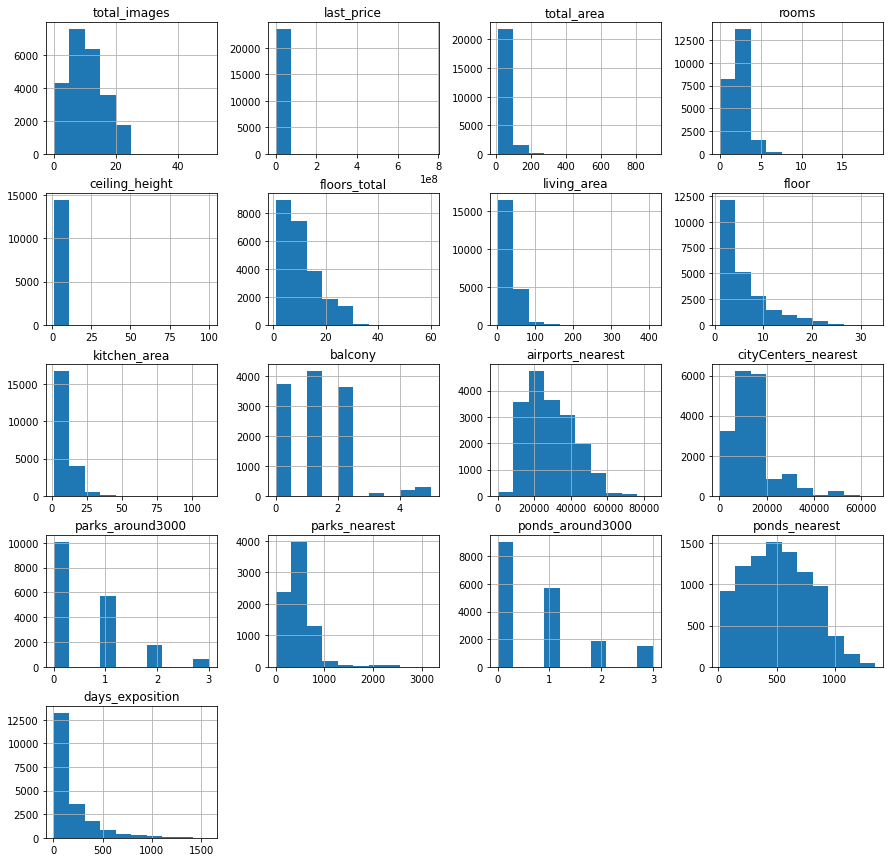

In [6]:
data.hist(figsize=(15, 15))
plt.show()

Из-за большого количества столбцов не очень удобно анализировать данные, поэтому я создам отдельные диаграммы для каждого столбца, чтобы провести детальный анализ первичных данных. Будем следовать порядку, указанному в описании данных.

## Предобработка данных

In [7]:
#приведем названия столбцов к единому стилю

data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Построение отдельных диаграмм по столбцам

#### Диаграмма для столбца airports_nearest

5542
Пропущено в airports_nearest 23.4% значений


min           0.000000
max       84869.000000
median    26726.000000
mean      28793.672193
Name: airports_nearest, dtype: float64

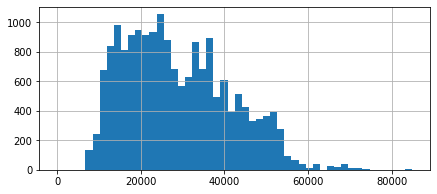

In [8]:
#расстояние до ближайшего аэропорта в метрах (м)
data['airports_nearest'].hist(figsize=(7, 3), bins = 50)
print(data['airports_nearest'].isna().sum())
print('Пропущено в airports_nearest {:.1%}'. format(data['airports_nearest'].isna().value_counts()[1] / len(data), 2) + ' значений')
data['airports_nearest'].agg(['min', 'max', 'median', 'mean'])

Расстояние от аэропорта 0 метров вызывает подозрения. Следует исключить эту строку из последующего анализа.

In [9]:
data = data.query('airports_nearest != 0')

Большинство объектов находятся на расстоянии от 10 до 26 км от аэропорта, а также немало объектов расположены на расстоянии от 30 до 38 км от аэропорта. Близко к аэропорту (до 10 км) объекты не представлены, вероятно, из-за шума самолетов.

Значения не заполнены у 23% объектов этого столбца.

#### Диаграмма для столбца balcony

11519
Пропущено в balcony 48.6% значений


min       0.000000
max       5.000000
median    1.000000
mean      1.150012
Name: balcony, dtype: float64

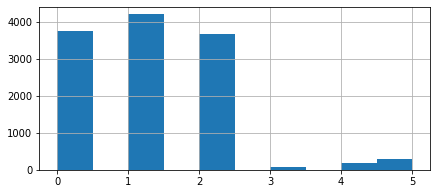

In [10]:
#число балконов
data['balcony'].hist(figsize=(7, 3))
print(data['balcony'].isna().sum())
print('Пропущено в balcony {:.1%}'. format(data['balcony'].isna().value_counts()[1] / len(data), 2) + ' значений')
data['balcony'].agg(['min', 'max', 'median', 'mean'])

Примерно равномерно распределены объекты с одним, двумя балконами или без балконов среди тех, где это поле заполнено. Также есть большие апартаменты с тремя, четырьмя или пятью балконами, причем объектов с пятью балконами больше, чем с тремя или четырьмя.

Значения не заполнены у 48% объектов этого столбца.

#### Диаграмма для столбца ceiling_height

2.50    3515
2.60    1646
2.70    1573
3.00    1112
2.80     993
2.55     980
2.75     910
2.65     676
3.20     277
3.10     203
Name: ceiling_height, dtype: int64
-----------
min         1.000000
max       100.000000
median      2.650000
mean        2.771504
Name: ceiling_height, dtype: float64
-----------
9195
Пропущено в ceiling_height 38.8% значений


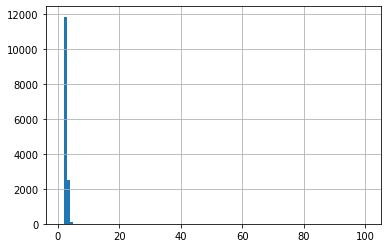

In [11]:
#высота потолков (м)
data['ceiling_height'].hist(bins=100)
print(data['ceiling_height'].value_counts().sort_values(ascending=False).head(10))
print('-----------')
print(data['ceiling_height'].agg(['min', 'max', 'median', 'mean']))
print('-----------')
print(data['ceiling_height'].isna().sum())
print('Пропущено в ceiling_height {:.1%}'. format(data['ceiling_height'].isna().value_counts()[1] / len(data), 2) + ' значений')

<AxesSubplot:>

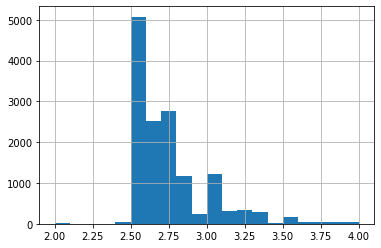

In [12]:
data['ceiling_height'].hist(bins=20, range = (2, 4))

Диапазон высот потолков в рассматриваемых объектах недвижимости в основном составляет от 2,5 до 2,85 метра, с наиболее распространенными вариантами 2,5 метра и 2,65 метра. Варианты с высотой потолков от 2,7 метра до 2,85 метра встречаются реже. Среднее значение высоты потолков составляет 2,7 метра, а медиана - 2,65 метра.

In [13]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#### Диаграмма для столбца city_centers_nearest

-----------
5519
min         181.000000
max       65968.000000
median    13098.000000
mean      14190.804225
Name: city_centers_nearest, dtype: float64
Пропущено в city_centers_nearest 23.3% значений


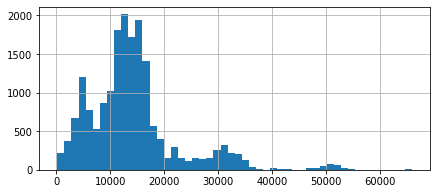

In [14]:
#расстояние до центра города (м)
data['city_centers_nearest'].hist(figsize=(7, 3), bins = 50)
print('-----------')
print(data['city_centers_nearest'].isna().sum())
print(data['city_centers_nearest'].agg(['min', 'max', 'median', 'mean']))
print('Пропущено в city_centers_nearest {:.1%}'. format(data['city_centers_nearest'].isna().value_counts()[1] / len(data), 2) + ' значений')

Большинство объектов находится на расстоянии от центра города от 11 до 18 км. Также значительное количество объектов располагается прямо в центре города или в непосредственной близости от него (до 8 км).

Значения не заполнены у 23% объектов этого столбца.

#### Диаграмма для столбца days_exposition

min          1.000000
max       1580.000000
median      95.000000
mean       180.894526
Name: days_exposition, dtype: float64
3181
Пропущено в days_exposition 13.4% значений


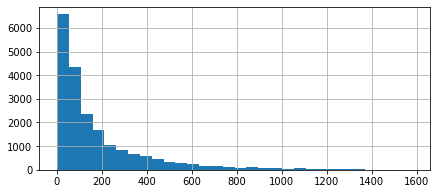

In [15]:
#сколько дней было размещено объявление (от публикации до снятия)
data['days_exposition'].hist(figsize=(7, 3), bins = 30)
print(data['days_exposition'].agg(['min', 'max', 'median', 'mean']))
print(data['days_exposition'].isna().sum())
print('Пропущено в days_exposition {:.1%}'. format(data['days_exposition'].isna().value_counts()[1] / len(data), 2) + ' значений')

Можно утверждать, что большинство объявлений были активны в течение 3-4 месяцев. Однако есть и те, которые, вероятно, публиковались уже не первый год. Встречаются и такие, которые висели несколько лет.

Значения не заполнены у 13% объектов этого столбца.

#### Диаграмма для столбца floor

2    3368
3    3072
1    2917
4    2804
5    2621
Name: floor, dtype: int64
0
0.0
min        1.00000
max       33.00000
median     4.00000
mean       5.89248
Name: floor, dtype: float64


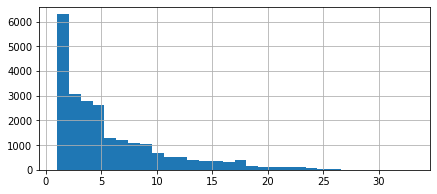

In [16]:
#этаж
data['floor'].hist(figsize=(7, 3), bins = 30)
print(data['floor'].value_counts(ascending=False).head())
print(data['floor'].isna().sum())
print(data['floor'].isna().sum()/ len(data))

print(data['floor'].agg(['min', 'max', 'median', 'mean']))

Большинство объявлений о продаже касались квартир, расположенных на первых пяти этажах. Второе место по количеству занимают объекты на этажах с шестого по девятый. В этом столбце нет незаполненных значений.

#### Диаграмма для столбца floors_total

86
Пропущено в floors_total 0.4% значений
min        1.000000
max       60.000000
median     9.000000
mean      10.673895
Name: floors_total, dtype: float64


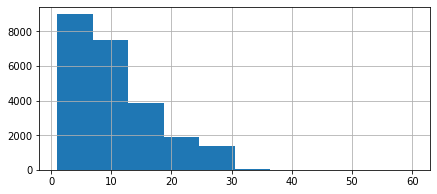

In [17]:
#всего этажей в доме
data['floors_total'].hist(figsize=(7, 3))
print(data['floors_total'].isna().sum())

print('Пропущено в floors_total {:.1%}'. format(data['floors_total'].isna().value_counts()[1] / len(data), 2) + ' значений')

print(data['floors_total'].agg(['min', 'max', 'median', 'mean']))

Большинство объявлений о продаже недвижимости в пятиэтажных домах и высотных зданиях до 12 этажей. В этом столбце доля незаполненных значений крайне мала - менее одного процента.

In [18]:
data['floors_total'] = data['floors_total'].fillna(method='ffill')

#### Диаграмма для столбца kitchen_area

0.09612625538020086
Пропущено в kitchen_area 9.6% значений
min         1.300000
max       112.000000
median      9.100000
mean       10.570021
Name: kitchen_area, dtype: float64


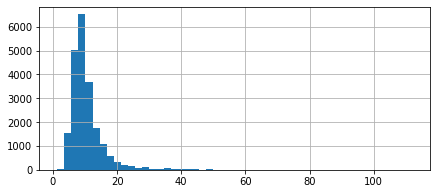

In [19]:
#площадь кухни в квадратных метрах (м²)
data['kitchen_area'].hist(figsize=(7, 3), bins = 50)
print(data['kitchen_area'].isna().sum() / len(data['kitchen_area']))

print('Пропущено в kitchen_area {:.1%}'. format(data['kitchen_area'].isna().value_counts()[1] / len(data), 2) + ' значений')

print(data['kitchen_area'].agg(['min', 'max', 'median', 'mean']))

Большинство объявлений о продаже недвижимости имеют кухню площадью от 4 до 15 квадратных метров.

#### Диаграмма для столбца living_area

0.0803021352012828
Пропущено в living_area 8.0% значений
min         2.000000
max       409.700000
median     30.000000
mean       34.458525
Name: living_area, dtype: float64


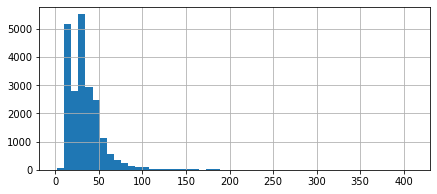

In [20]:
#жилая площадь в квадратных метрах (м²)
data['living_area'].hist(figsize=(7, 3), bins = 50)
print(data['living_area'].isna().sum() / len(data['living_area']))
print('Пропущено в living_area {:.1%}'. format(data['living_area'].isna().value_counts()[1] / len(data), 2) + ' значений')

print(data['living_area'].agg(['min', 'max', 'median', 'mean']))

Более детально рассмотрим интересующую нас область с максимальными показателями.

<AxesSubplot:>

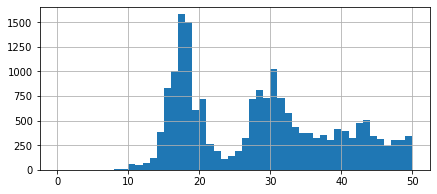

In [21]:
data['living_area'].hist(figsize=(7, 3), bins = 50, range = (0,50))

В данной выборке больше всего продается квартир площадью от 15 до 18 квадратных метров, а также от 27 до 33 квадратных метров.

Большая часть данных относится к продаже квартир площадью от 15 до 50 квадратных метров. Скорее всего, это студии, однокомнатные или двухкомнатные квартиры.

В этом столбце доля незаполненных значений составляет 8%.

In [22]:
#Добавим столбец соотношения жилой площади к общей площади
data['useful_area_ratio'] = data['living_area'] / data['total_area']
#Возьмем медианный коэ-т отношения
k_liv_total = data['useful_area_ratio'].median()
#Проверим данные на адекватность
k_liv_total

0.5678346810422282

In [23]:
#Заменим пропуски в столбце с жилой площадью на общую площадь, умноженную на коэ-т отношения, найденный выше
data['living_area'] = data['living_area'].fillna(data['total_area'] * k_liv_total)

In [24]:
#Проверим количество пропусков
data['living_area'].isna().sum()

0

#### Диаграмма для столбца parks_around_3000

0.0    10105
1.0     5681
2.0     1747
3.0      647
Name: parks_around_3000, dtype: int64
5518
Пропущено в parks_around_3000 23.3% значений


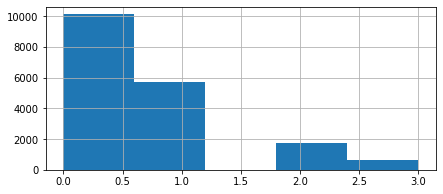

In [25]:
#число парков в радиусе 3 км
data['parks_around_3000'].hist(figsize=(7, 3), bins = 5)
print(data['parks_around_3000'].value_counts(ascending=False))

print(data['parks_around_3000'].isna().sum())

print('Пропущено в parks_around_3000 {:.1%}'. format(data['parks_around_3000'].isna().value_counts()[1] / len(data), 2) + ' значений')

Большинство объектов не имеют близлежащих парков. В 5681 объекте рядом находится один парк, в 1747 объектах - два парка, и в 647 объектах рядом расположены два парка. Значения не заполнены у 23% объектов этого столбца.

#### Диаграмма для столбца parks_nearest

15619
Пропущено в parks_nearest 65.9% значений
min          1.000000
max       3190.000000
median     455.000000
mean       490.804555
Name: parks_nearest, dtype: float64


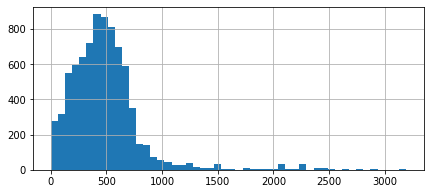

In [26]:
#расстояние до ближайшего парка (м)
data['parks_nearest'].hist(figsize=(7, 3), bins = 50)
print(data['parks_nearest'].isna().sum())

print('Пропущено в parks_nearest {:.1%}'. format(data['parks_nearest'].isna().value_counts()[1] / len(data), 2) + ' значений')

print(data['parks_nearest'].agg(['min', 'max', 'median', 'mean']))

Большинство объектов имеют ближайший парк на расстоянии от 200 до 700 метров. Значения не заполнены у 66% объектов этого столбца, вероятно, потому что данные не могли быть заполнены для случаев, когда вокруг дома нет парков.

#### Диаграмма для столбца ponds_around_3000

0.0    9070
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around_3000, dtype: int64
5518
Пропущено в ponds_around_3000 23.3% значений


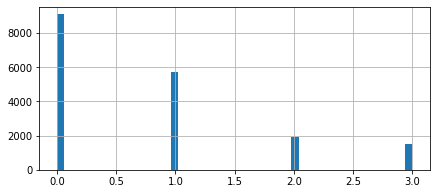

In [27]:
#число водоёмов в радиусе 3 км
data['ponds_around_3000'].hist(figsize=(7, 3), bins = 50)
print(data['ponds_around_3000'].value_counts(ascending=False))

print(data['ponds_around_3000'].isna().sum())
print('Пропущено в ponds_around_3000 {:.1%}'. format(data['ponds_around_3000'].isna().value_counts()[1] / len(data), 2) + ' значений')

В представленной выборке большинство объектов не имеют доступности к водоемам. Около 6000 квартир имеют рядом один водоем, у 2000 квартир рядом есть два водоема, и у 1501 объекта рядом целых три водоема. Столбец содержит 23% незаполненных значений.

#### Диаграмма для столбца ponds_nearest

14588
Пропущено в ponds_nearest 61.6% значений


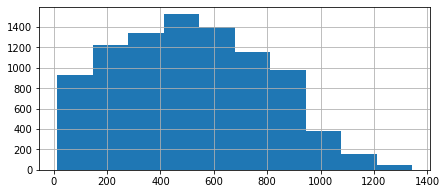

In [28]:
#расстояние до ближайшего парка (м)
data['ponds_nearest'].hist(figsize=(7, 3), bins = 10)
print(data['ponds_nearest'].isna().sum())
print('Пропущено в ponds_nearest {:.1%}'. format(data['ponds_nearest'].isna().value_counts()[1] / len(data), 2) + ' значений')

Среди квартир, имеющих рядом водоемы, большинство находятся на расстоянии около одного километра от ближайшего водоема. Однако, у 61% данных в столбце отсутствуют значения. 

#### Диаграмма для столбца rooms

1     8046
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64
0.0
min        0.000000
max       19.000000
median     2.000000
mean       2.070681
Name: rooms, dtype: float64


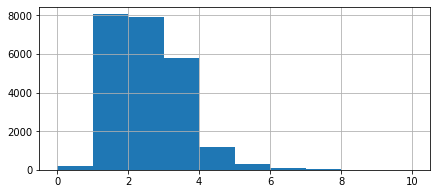

In [29]:
#число комнат
data['rooms'].hist(figsize=(7, 3), range = (0, 10))
print(data['rooms'].value_counts(ascending=False))
print(data['rooms'].isna().sum() / len(data['rooms']))
print(data['rooms'].agg(['min', 'max', 'median', 'mean']))

Однокомнатные и двухкомнатные квартиры представлены примерно в равном количестве в нашей выборке. Около 6000 из 23000 квартир являются трехкомнатными, а почти 1200 - четырехкомнатными. Квартиры с большим количеством комнат представлены в значительно меньшем количестве.

#### Диаграмма для столбца total_area

0.0
min        12.000000
max       900.000000
median     52.000000
mean       60.349733
Name: total_area, dtype: float64


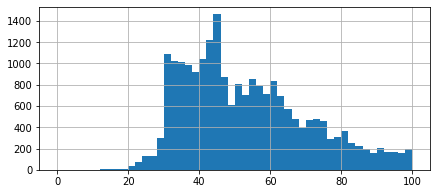

In [30]:
data['total_area'].hist(figsize=(7, 3), range = (0, 100), bins = 50)
print(data['total_area'].isna().sum() / len(data['total_area']))
print(data['total_area'].agg(['min', 'max', 'median', 'mean']))

Большинство объектов имеют общую площадь от 30 до 75 квадратных метров. Есть два пика, вероятно, типовых застроек, с наибольшим количеством объектов жилой площадью: 33 квадратных метра и 44-46 квадратных метров. В этом столбце нет незаполненных значений.

Вернемся к информации о количестве пропусков.

В 14 из 22 столбцов присутствуют пропуски.

В столбце "ceiling_height" (высота потолков) пропущено 9195 значений, что составляет почти 40% от общего числа объявлений. Это большое количество пропусков, но для нашего исследования данные по этому столбцу не так важны. Тем не менее, следует учесть, что для более чем трети объектов значение высоты потолков не указано.

В столбце "floors_total" (общее количество этажей) пропущено всего 86 значений, что не окажет существенного влияния на исследование.

В столбце "living_area" (площадь жилого помещения) пропущено 1903 значения. Вероятно, пользователи не помнят точную площадь, поэтому не указывают её. Количество пропусков менее 10%, они заполнены по отношению к общей площади квартиры

В столбце "is_apartment" (является ли объект квартирой) пропущено 20924 значения. Вероятно, пользователи часто не указывают тип недвижимости, если он просто жилой. Поскольку в этом столбце тип данных булевский, пропущенные значения можно заменить на "False".

В столбце "kitchen_area" (площадь кухни) пропущено 2278 значений. Вероятно, пользователи не указывают точный метраж кухни, поскольку не знают его. Количество пропусков менее 10%, но данные по этому столбцу важны для исследования. Заполнить пропущенные значения нечем, поэтому их придется оставить.

В столбце "balcony" (наличие балкона) пропущено 11519 значений. Вероятно, пользователи при отсутствии балкона не указывают его. В таком случае пропущенные значения можно заменить на "0".

В остальных столбцах количество пропусков незначительно, и они не окажут существенного влияния на исследование.

Обработаем пропуски в столбцах "is_apartment" и "balcony", значения которых заменим на "False" и "0" соответственно, и далее сможем продолжить анализ данных.

In [31]:
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].isna().sum()

0

In [32]:
data['balcony'].fillna(0, inplace=True)
data['balcony'].isna().sum()

0

Теперь заполним пропущенные значения по высоте потолков медианой относительно населённых пунктов и пропущенные значения по удалённости от центра медианой относительно населённых пунктов.

In [33]:
for locality in data['locality_name'].unique():
    median_value = data.loc[data['locality_name'] == locality, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) | (data['locality_name'] == locality), 'ceiling_height'] = median_value

data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

In [34]:
for locality in data['locality_name'].unique():
    #Выберем подмассив данных для текущего locality
    locality_data = data.loc[data['locality_name'] == locality, 'city_centers_nearest']

    #Проверим ненулевые значения в подмассиве
    if not locality_data.empty and locality_data.notna().any():
        median_value = locality_data.median()
        data.loc[(data['city_centers_nearest'].isna()) & (data['locality_name'] == locality), 'city_centers_nearest'] = median_value

#Заполняем оставшиеся NaN средним значением
data['city_centers_nearest'].fillna(data['city_centers_nearest'].mean(), inplace=True)

Явных дубликатов обнаружено ранее не было, поэтому обработаем неявные дубликаты.

### Обработка неявных дубликатов

In [35]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Можно заметить, что записи 'поселок' и 'посёлок' дублируют друг друга. Мы заменим все вхождения 'поселок' на 'посёлок' с помощью метода замены строк - replace.

In [36]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

In [37]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Большая Ижора', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Советский', 'городской посёлок Фёд

In [38]:
data['locality_name'].nunique()

330

Также существуют повторяющиеся названия населенных пунктов. Мы приведем их к одному значению с помощью метода замены строк - replace.

In [39]:
#Оставим только названия
data['locality_name'] = (data['locality_name'].replace(['поселок ','при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'городского типа ',
             'деревня ', 'городской поселок '], '', regex=True))
#Посмотрим уникальные значения в алфавитном порядке
set(data['locality_name'].unique())

{nan,
 'Агалатово',
 'Аро',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Ваганово',
 'Вартемяги',
 'Вахнова Кара',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Выскатка',
 'Высоцк',
 'Гарболово',
 'Гатчина',
 'Глинка',
 'Горбунки',
 'Гостилицы',
 'Заклинье',
 'Заневка',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Иссад',
 'Калитино',
 'Кальтино',
 'Каменногорск',
 'Камышовка',
 'Каськово',
 'Келози',
 'Кингисепп',
 'Кипень',
 'Кириши',
 'Кировск',
 'Кисельня',
 'Колпино',
 'Колтуши',
 'Коммунар',
 'Копорье',
 'Коркино',
 'Котлы',
 'Красное Село',
 'Кривко',
 'Кронштадт',
 'Кудрово',
 'Кузьмолово',
 'Курковицы',
 'Куровицы',
 'Куттузи',
 'Лаврики',
 'Лаголово',
 'Лампово',
 'Лесколово',
 'Лесная Поляна',
 'Лодейное Поле',
 'Ломоносов',
 'Лопухинка',
 'Луга',
 'Лупполово',
 'Любань',
 'Малая Романовка',
 'Малое Верево',
 'Малое Карли

***data = data.replace({'locality_name':{'Никольское': 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский', 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский', 'посёлок Рябово': 'посёлок городского типа Рябово', 'городской посёлок Мга': 'посёлок городского типа Мга', 'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия': 'посёлок городского типа Назия', 'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 'Любань': 'посёлок Любань', 'городской посёлок Рощино': 'посёлок городского типа Рощино', 'деревня Кудрово': 'Кудрово'}})***

In [40]:
data['locality_name'].nunique()

324

После очистки данных было удалено 6 неявных дубликатов

### Преобразования типов данных в столбцах

Также мы удалим строки, в которых отсутствует информация о городе. 

In [41]:
data = data.dropna(subset=['locality_name'])

In [42]:
data['locality_name'].isna().sum()

0

Также изменим тип данных в следующих столбцах: "last_price" будет преобразован в int64, "first_day_exposition" станет типом datetime, "is_apartment" будет иметь тип boolean, а "balcony" будет преобразован в int64.

In [43]:
data[['last_price', 'balcony']] = data[['last_price', 'balcony']].apply(lambda x: x.astype('int64'))
data[['last_price', 'balcony']].dtypes

last_price    int64
balcony       int64
dtype: object

In [44]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
useful_area_ratio              float64
dtype: object

In [45]:
data['is_apartment'] = data['is_apartment'].astype('boolean')
data['is_apartment'].dtypes

BooleanDtype

In [46]:
#Финальная проверка всех столбцов
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                   boolean
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
useful_area_ratio              float64
dtype: object

### Добавление в таблицу новых столбцов

Далее произведем необходимые расчеты с данными и добавим их в таблицу для дальнейшего анализа.

- "price_one_square_meter": цена одного квадратного метра;
- "exposition_weekday": день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- "exposition_month": месяц публикации объявления;
- "exposition_year": год публикации объявления;
- "floor_category": тип этажа квартиры (значения — «первый», «последний», «другой»);
- "city_centers_nearest_km": расстояние до центра города в километрах

In [47]:
#Добавим столбец price_one_square_meter
data['price_one_square_meter'] = data['last_price'] / data['total_area']

In [48]:
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,useful_area_ratio,price_one_square_meter
17156,20,4600000,61.5,2017-02-20,2,2.650,9.0,33.3,9,False,...,посёлок Шушары,19155.0,31730.000000,0.0,NaN,0.0,NaN,18.0,0.541463,74796.747967
14623,19,5850000,47.0,2015-11-10,1,2.650,14.0,18.0,9,False,...,Санкт-Петербург,15903.0,7953.000000,1.0,1053.0,0.0,NaN,288.0,0.382979,124468.085106
5837,6,4500000,185.0,2018-08-14,3,2.650,3.0,62.0,2,False,...,Выборг,NaN,14231.213369,NaN,NaN,NaN,NaN,NaN,0.335135,24324.324324
7851,18,1670000,48.0,2018-02-10,2,2.575,5.0,27.0,5,False,...,посёлок Гаврилово,NaN,14231.213369,NaN,NaN,NaN,NaN,45.0,0.562500,34791.666667
10147,20,4850000,40.1,2018-10-08,1,2.650,16.0,17.1,8,False,...,Санкт-Петербург,20956.0,22668.000000,0.0,NaN,0.0,NaN,10.0,0.426434,120947.630923


In [49]:
#Добавим столбец с днем недели публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

In [50]:
#Добавим столбец с месяцем публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

In [51]:
#Добавим столбец с годом публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

In [52]:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,useful_area_ratio,price_one_square_meter,exposition_weekday,exposition_month,exposition_year
23694,9,9700000,133.81,2017-03-21,3,2.650,5.0,73.300000,3,False,...,1.0,796.0,3.0,381.0,NaN,0.547792,72490.845228,1,3,2017
23695,14,3100000,59.00,2018-01-15,3,2.575,5.0,38.000000,4,False,...,NaN,NaN,NaN,NaN,45.0,0.644068,52542.372881,0,1,2018
23696,18,2500000,56.70,2018-02-11,2,2.650,3.0,29.700000,1,False,...,NaN,NaN,NaN,NaN,NaN,0.523810,44091.710758,6,2,2018
23697,13,11475000,76.75,2017-03-28,2,2.650,17.0,43.581312,12,False,...,2.0,173.0,3.0,196.0,602.0,NaN,149511.400651,1,3,2017
23698,4,1350000,32.30,2017-07-21,1,2.625,5.0,12.300000,1,False,...,NaN,NaN,NaN,NaN,NaN,0.380805,41795.665635,4,7,2017


Добавим новый столбец "floor_category", который будет содержать информацию о категории этажа квартиры.

In [53]:
def get_floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [54]:
data['floor_category'] = data.apply(get_floor_category, axis=1)

In [55]:
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,useful_area_ratio,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category
346,5,2100000,48.2,2016-08-18,3,2.55,5.0,33.6,5,False,...,NaN,NaN,NaN,635.0,0.697095,43568.464730,3,8,2016,последний
22986,15,4100000,52.2,2018-08-11,2,2.65,5.0,30.0,5,False,...,NaN,0.0,NaN,110.0,0.574713,78544.061303,5,8,2018,последний
20146,16,3850000,36.0,2018-10-12,1,2.65,8.0,19.0,15,False,...,NaN,0.0,NaN,183.0,0.527778,106944.444444,4,10,2018,другой


Добавим столбец city_centers_nearest_km.

In [56]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

In [57]:
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,useful_area_ratio,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.65,16.0,51.0,8,False,...,2.0,755.0,NaN,0.472222,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,NaN,81.0,0.460396,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2.0,574.0,558.0,0.612500,92785.714286,3,8,2015,другой,14.0


Вывод: Мы добавили необходимые столбцы и провели расчеты по ним. Стоит отметить, что из-за наличия пропущенных значений в исходных данных, в расчетных значениях также имеются пропуски. Однако, учитывая, что доля возможных ошибок крайне мала, они не окажут значительного влияния на результаты исследования.

## Исследовательский анализ данных

### Ислледование данных по цене объекта

Рассмотрим также категорию - цена объекта

In [58]:
data['last_price'].describe().T

count    2.364900e+04
mean     6.541107e+06
std      1.089663e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

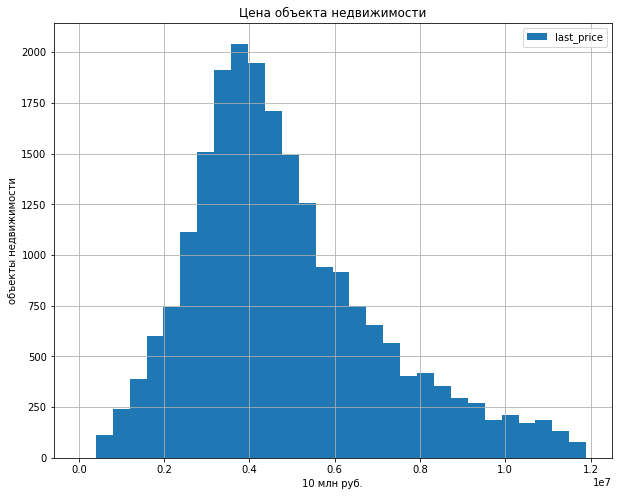

In [59]:
q1 = data['last_price'].quantile(.25) # первый квартиль Q1
q3 = data['last_price'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

#Гистограмма цены
data['last_price'].hist(bins=30, range=(0, (q3 + 1.5 * iqr)), figsize=(10, 8), legend=True)
plt.title('Цена объекта недвижимости')
plt.xlabel('10 млн руб.')
plt.ylabel('объекты недвижимости')
plt.show()

Диапазон цен на рассматриваемые объекты недвижимости в основном составляет от 3 до 5 миллионов рублей, с наиболее распространенным вариантом около 3,5 миллиона рублей. Объекты с ценой более 10 миллионов рублей встречаются редко. Среднее значение цены составляет 6,5 миллиона рублей, а медиана - 4,6 миллиона рублей.

### Исследование по дню и месяцу публикации объявления

#### День публикации объявления

In [60]:
data['exposition_weekday'].describe().T

count    23649.000000
mean         2.568565
std          1.788706
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: exposition_weekday, dtype: float64

In [61]:
data['exposition_weekday'].value_counts().sort_values()

6    1691
5    1933
0    3606
2    3966
4    3992
1    4175
3    4286
Name: exposition_weekday, dtype: int64

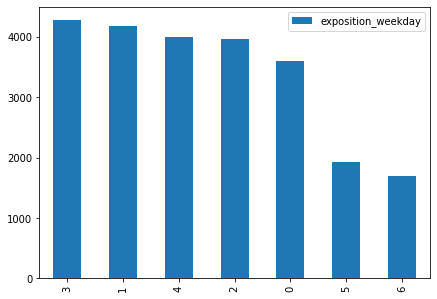

In [62]:
data['exposition_weekday'].value_counts().plot.bar(figsize=(7, 5), legend=True)
plt.show()

По графику видно, что чаще всего объявления публиковали в будние дни в середине недели. Реже в выходные дни.

#### Месяц публикации объявления

In [63]:
data['exposition_month'].describe().T

count    23649.000000
mean         6.401455
std          3.491451
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

In [64]:
data['exposition_month'].value_counts().sort_values()

5     1270
1     1491
12    1638
7     1690
8     1742
6     1755
9     1978
10    2124
11    2367
4     2373
3     2582
2     2639
Name: exposition_month, dtype: int64

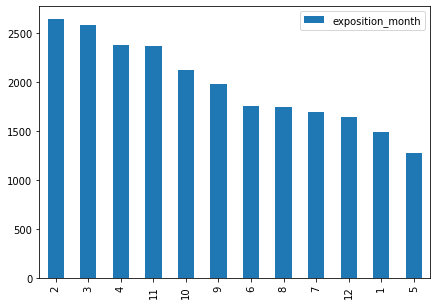

In [65]:
data['exposition_month'].value_counts().plot.bar(figsize=(7, 5), legend=True)
plt.show()

Анализируя график, можно заметить, что наибольшее количество объявлений было опубликовано после январских праздников, в феврале. Меньше всего объявлений было опубликовано в январе и мае. Это может быть связано с большим количеством выходных и праздничных дней в эти месяцы.

#### Вывод

Исходя из предоставленных данных, мы можем сформировать представление о типичном объекте недвижимости. Это квартира с одной или двумя комнатами, расположенная в пятиэтажном или девятиэтажном доме, на первом-четвертом этажах. Общая площадь квартиры составляет около 45 квадратных метров, площадь кухни - около 5,5 квадратных метров. Высота потолков - 2,6 метра. Стоимость квартиры - около 3,5 миллиона рублей. Расстояние до центра города - 11000-16000 метров, до аэропорта - 15000-25000 метров, до ближайшего парка - около 500 метров.

### Исследование по скорости продажи квартир

Изучим, как быстро продавались квартиры (столбец "days_exposition").
Построим гистограмму, чтобы визуализировать распределение времени экспозиции.
Посчитаем среднее и медиану времени экспозиции, чтобы оценить общие тенденции.
В ячейке типа Markdown опишем, сколько времени обычно занимает продажа. Определите, какие продажи можно считать быстрыми, а какие — необычно долгими.

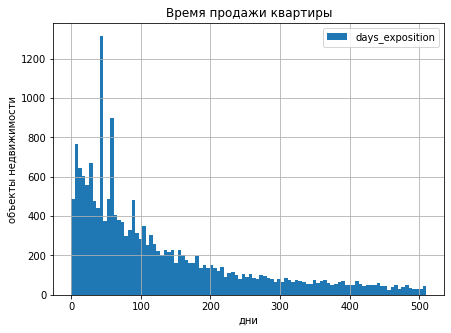

In [66]:
q1 = data['days_exposition'].quantile(.25) # первый квартиль Q1
q3 = data['days_exposition'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

data['days_exposition'].hist(bins=100, range=(0, (q3 + 1.5 * iqr)), figsize=(7, 5), legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

На графике отчетливо видны пики, соответствующие периоду около 50-60 дней, однако с учетом длинного "хвоста" данных, делать однозначные выводы не представляется возможным. Для получения более четкой картины, предлагаю изменить масштаб графика, ограничив период до 100 дней.

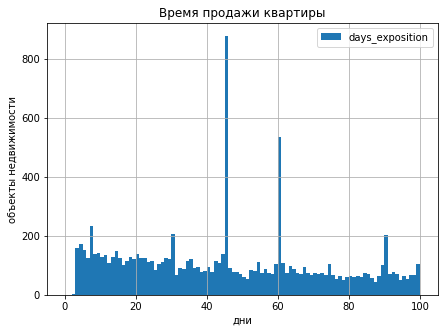

In [67]:
data['days_exposition'].hist(bins=100, range=(0, 100), figsize=(7, 5), legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

Анализируя график, можно сделать вывод, что наиболее часто квартиры продаются за 45 и 60 дней. Однако стоит учитывать, что эти данные могут быть искажены из-за различных факторов. Например, объявление могло быть закрыто не потому, что квартира была продана, а из-за истечения срока публикации. Также объявление может оставаться на сайте даже после фактической продажи, если его не сняли вовремя. В таком случае, если пользователь не подтвердит актуальность объявления, оно может быть автоматически удалено.

Теперь давайте обратимся к среднему и медиане.

In [68]:
data['days_exposition'].describe().T

count    20469.000000
mean       180.759099
std        219.781664
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи объекта недвижимости составляет 181 день, в то время как медианное время - 95 дней. Максимальное время продажи достигает 1580 дней. Анализируя график, можно заметить длинный "хвост", что указывает на большое количество больших значений. Среднее значение почти в два раза больше медианного, что свидетельствует о наличии выбросов в данных. Для лучшего понимания всей картины рекомендуется построить диаграмму размаха.

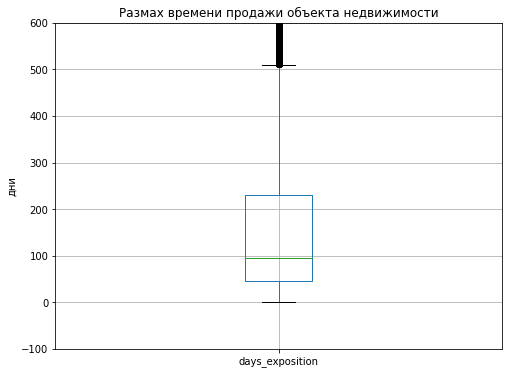

In [69]:
data.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи объекта недвижимости')
plt.ylim(-100, 600)
plt.ylabel('дни')
plt.show()

In [70]:
#Посмотрим количество выбросов
print(q3 + 1.5 * iqr)

510.0


In [71]:
len(data)

23649

In [72]:
#Убираем выбросы
data_update = data.query('days_exposition < 510')
len(data_update)

18789

In [73]:
x=((len(data_update)-len(data))/len(data))*100
x

-20.550551820372952

#### Вывод

Из исходного датафрейма были удалены 4860 строки, которые содержали аномальные значения времени продажи объектов недвижимости. После этого была проведена оценка времени продажи: быстрая продажа - до 45 дней, нормальная продажа - от 45 до 231 дней, долгая продажа - от 231 до 510 дней. Продажи, превышающие 510 дней, классифицируются как выбросы.

Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.
Изучим, зависит ли цена от:

- общей площади;

- жилой площади;

- площади кухни;

- количества комнат;

- этажа, на котором расположена квартира (первый, последний, другой);

- даты размещения (день недели, месяц, год). 
    
Построим графики, которые покажут зависимость цены от указанных выше параметров

### Опредление факторов, которые больше всего влияют на общую стоимость объекта.

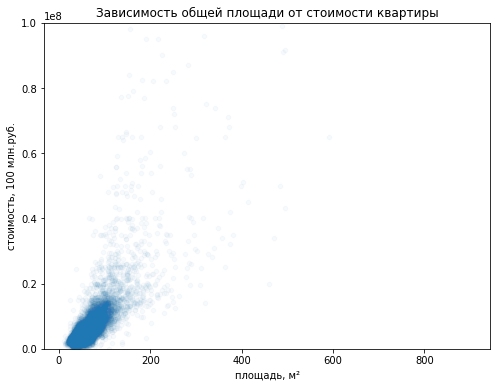

In [74]:
data_update.plot(x='total_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость общей площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Анализируя график, можно заметить, что наибольшее количество данных относится к квартирам стоимостью до 20 миллионов рублей и площадью до 150 квадратных метров. Зависимость между этими параметрами является прямо пропорциональной - чем больше площадь квартиры, тем выше ее стоимость.

### Зависимость жилой площади от стоимости квартиры

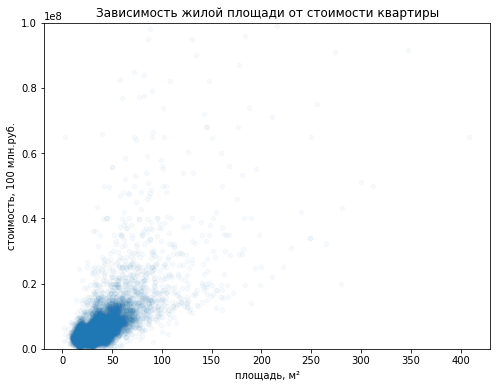

In [75]:
data_update.plot(x='living_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость жилой площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Анализируя график, можно заметить, что наибольшее количество данных относится к квартирам стоимостью до 20 миллионов рублей и жилой площадью до 75 квадратных метров. Зависимость между этими параметрами является прямо пропорциональной - чем больше жилая площадь квартиры, тем выше ее стоимость.

### Зависимость площади кухни от стоимости квартиры

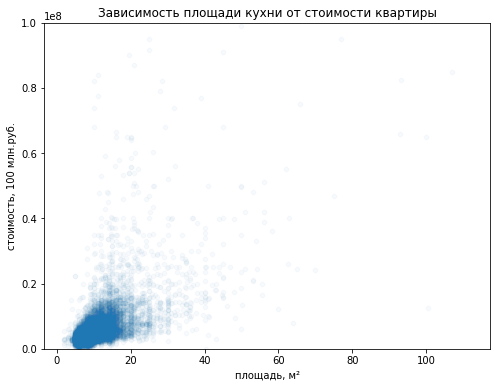

In [76]:
data_update.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость площади кухни от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Анализируя график, можно заметить, что наибольшее количество данных относится к квартирам стоимостью до 20 миллионов рублей и площадью кухни до 18 квадратных метров. Зависимость между этими параметрами является прямо пропорциональной - чем больше площадь кухни, тем выше стоимость квартиры.

### Зависимость количества комнат от стоимости квартиры

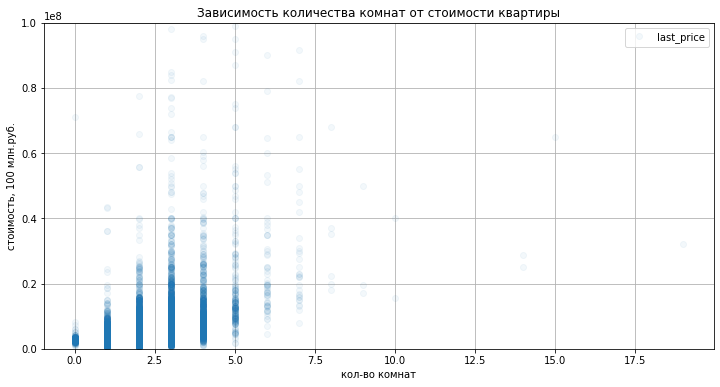

In [77]:
data_update.plot(x = 'rooms', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.05)
plt.title('Зависимость количества комнат от стоимости квартиры')
plt.xlabel('кол-во комнат')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Анализируя график, можно заметить, что наибольшее количество данных относится к квартирам стоимостью до 20 миллионов рублей и количеством комнат от 1 до 3. Для этого диапазона наблюдается следующая закономерность: с увеличением числа комнат до 3 комнат стоимость квартир растет, от 3 до 4 комнат цена остается примерно одинаковой, а для квартир с 5 комнатами стоимость снижается. Это может быть объяснено тем, что в старом фонде могут встречаться 5-комнатные квартиры с относительно небольшой площадью комнат, что влияет на их стоимость.

### Зависимости стоимости квартиры от дня, месяца и года публикации

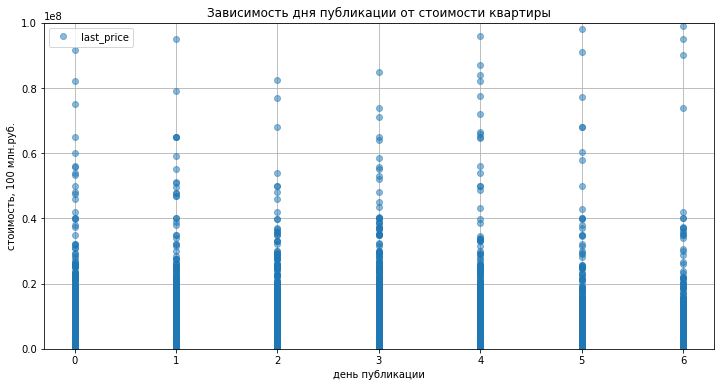

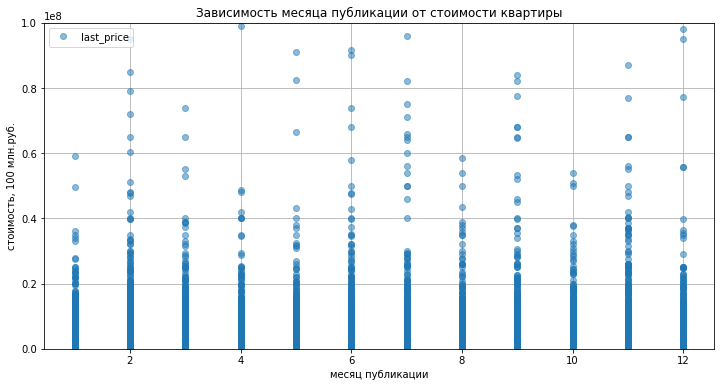

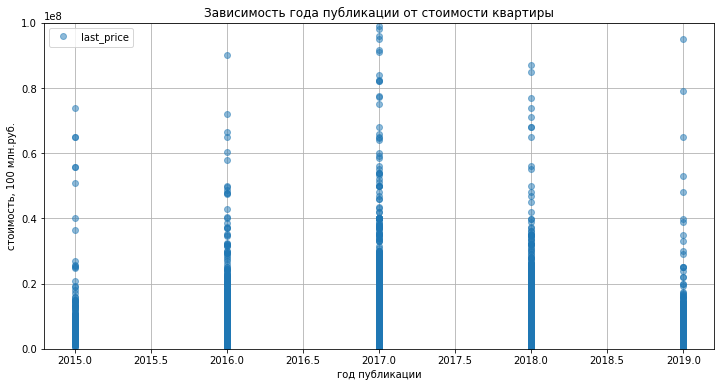

In [78]:
data_update.plot(x = 'exposition_weekday', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость дня публикации от стоимости квартиры')
plt.xlabel('день публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()


data_update.plot(x = 'exposition_month', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость месяца публикации от стоимости квартиры')
plt.xlabel('месяц публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()


data_update.plot(x = 'exposition_year', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость года публикации от стоимости квартиры')
plt.xlabel('год публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Анализ зависимости между датой размещения объявления (день недели, месяц, год) и стоимостью квартир показал отсутствие значимой корреляции.

### Зависимость стоимости квартиры от этажа

Для анализа связи между этажом и стоимостью квартиры, сначала необходимо создать сводную таблицу, объединив данные по этажам и стоимости. Затем можно визуализировать результаты на графике, чтобы наглядно увидеть зависимость между этими параметрами.

,mean,count,median
floor_category,,,
другой,6.213986e+06,13998,4650000
первый,4.436741e+06,2239,3790000
последний,6.837171e+06,2552,4200000


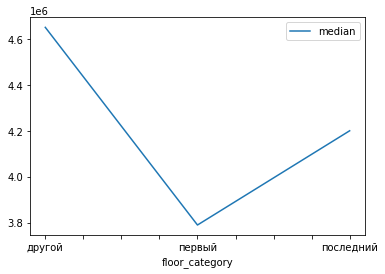

In [79]:
pivot_table_floor_category = data_update.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])

pivot_table_floor_category.columns = ['mean', 'count', 'median']

pivot_table_floor_category.plot(y = 'median', legend=True)

pivot_table_floor_category

Анализируя график, можно заметить, что медианное значение стоимости квартир на первом этаже является наименьшим среди всех этажей. Максимальное медианное значение наблюдается для квартир, которые находятся на этажах, отличных от первого и последнего.

На общую стоимость объекта недвижимости наибольшее влияние оказывают общая площадь квартиры и этаж, на котором она расположена. Чем больше площадь, тем выше стоимость. Квартиры на первом и последнем этажах обычно стоят меньше, чем на других этажах. Дата публикации объявления не оказывает значительного влияния на стоимость.

### Расчет стоимости кв м в первых 10 городах с наибольшим количеством объявлений.

Посчитаем среднюю цену одного квадратного метра в десяти населенных пунктах с наибольшим количеством объявлений. Для этого создадим сводную таблицу, включающую количество объявлений и среднюю цену квадратного метра для каждого из этих населенных пунктов. Затем выделим населенные пункты с самой высокой и самой низкой стоимостью квадратного метра.

In [80]:
top_10_localities = data_update['locality_name'].value_counts().head(10)
top_10_localities

Санкт-Петербург      12466
посёлок Мурино         518
Кудрово                407
посёлок Шушары         388
Всеволожск             308
Колпино                294
посёлок Парголово      288
Пушкин                 278
Гатчина                244
Выборг                 193
Name: locality_name, dtype: int64

In [81]:
top_10_localities_pivot = data_update.query('locality_name in @top_10_localities.index').pivot_table(index='locality_name', values='price_one_square_meter')
top_10_localities_pivot.sort_values(by='price_one_square_meter', ascending=False)

,price_one_square_meter
locality_name,
Санкт-Петербург,111722.043102
Пушкин,101894.611356
Кудрово,94568.169758
посёлок Парголово,89162.888160
посёлок Мурино,85962.868415
посёлок Шушары,77914.528090
Колпино,74748.675396
Всеволожск,68605.620450
Гатчина,68065.179716


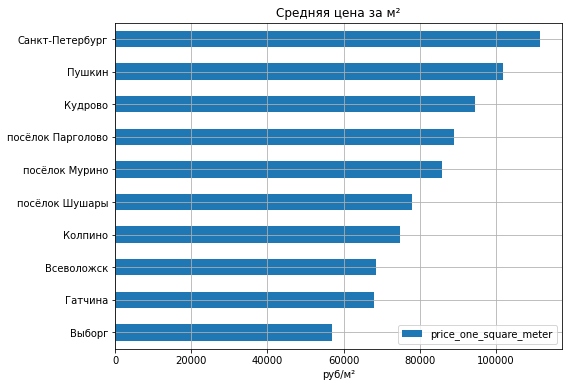

In [82]:
top_10_localities_pivot.sort_values(by='price_one_square_meter').plot(kind='barh', legend=True, grid=True, figsize=(8, 6))

plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.ylabel('')
plt.show()

Анализируя график, можно заметить, что наибольшая средняя цена за один квадратный метр недвижимости наблюдается в Санкт-Петербурге, что вполне ожидаемо. Следующим по стоимости идет Пушкин, что также логично, учитывая его историческое значение и близость к городу. Наименьшая цена за квадратный метр зафиксирована в Выборге.

Теперь выделим квартиры в Санкт-Петербурге и рассчитаем их среднюю стоимость на разных расстояниях от центра. Учитываем каждый километр расстояния: определим среднюю цену квартир в одном километре от центра, в двух километрах и так далее. Опишем, как стоимость объектов изменяется в зависимости от расстояния до центра города. Для наглядности построим график изменения средней цены для каждого километра от центра Санкт-Петербурга.

In [83]:
data['distance_city_center'] = (data['city_centers_nearest']/1000).round(0)
data['distance_city_center'].unique()

array([16., 19., 14.,  7.,  8., 12., 15., 52., 33., 31., 11., 13., 10.,
        2., 32.,  4., 17., 30.,  5., 22., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 55.,
       20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48., 62.,
       60., 39., 42., 65., 54., 59., 45., 61., 63.])

In [84]:
spb_data = data.query('locality_name == "Санкт-Петербург"')
spb_data['distance_city_center'].describe()
spb_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,useful_area_ratio,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km,distance_city_center
0,20,13000000,108.0,2019-03-07,3,2.65,16.0,51.000000,8,False,...,755.0,NaN,0.472222,120370.370370,3,3,2019,другой,16.0,16.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,574.0,558.0,0.612500,92785.714286,3,8,2015,другой,14.0,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,90.285714,9,False,...,234.0,424.0,NaN,408176.100629,4,7,2015,другой,7.0,7.0
4,2,10000000,100.0,2018-06-19,2,2.65,14.0,32.000000,13,False,...,48.0,121.0,0.320000,100000.000000,1,6,2018,другой,8.0,8.0
7,5,7915000,71.6,2019-04-18,2,2.65,24.0,40.656963,22,False,...,NaN,NaN,NaN,110544.692737,3,4,2019,другой,12.0,12.0


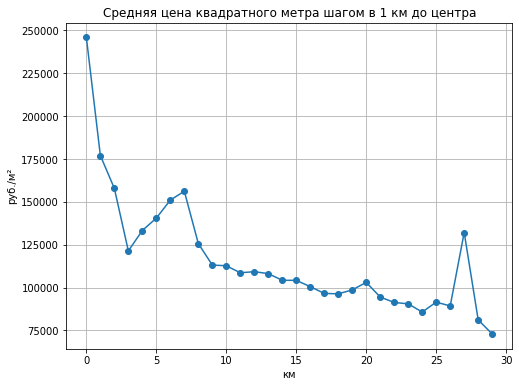

In [85]:
(
spb_data
    .pivot_table(index='city_centers_nearest_km', values='price_one_square_meter')
    .plot(marker='o', grid=True, figsize=(8, 6), legend=False)
)
plt.title('Средняя цена квадратного метра шагом в 1 км до центра')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()

Изучив график, можно сказать, что цены начинают снижаться после седьмого километра от центра города. Наиболее высокая стоимость — в центре, в радиусе одного-двух километров. Цены резко возрастают в районе 27 километра. Возможно, это связано с тем, что там находится элитное жильё.

## Общий вывод

Мы провели обработку полученного архива данных, выполнив ряд необходимых действий. Во-первых, преобразовали типы данных для удобства работы. Во-вторых, добавили категории по этажам квартир.

Далее мы проанализировали следующие параметры на наличие аномальных значений: площадь, цена, количество комнат, высота потолков. В результате были обнаружены аномалии в этих параметрах.

При изучении времени продажи квартир мы обнаружили, что большое количество объявлений было автоматически удалено с платформы Яндекс Недвижимость, и эти даты не могут считаться датами продажи квартир. Поэтому, при анализе средних сроков продажи квартир, эти данные не учитывались.


В ходе анализа мы пришли к выводу, что на стоимость квадратного метра квартиры наибольшее влияние оказывают такие факторы, как количество комнат, этаж квартиры и её близость к центру города. Влияние дня, месяца и года размещения объявления, а также общей площади квартиры на стоимость квадратного метра незначительно.


Большинство объектов недвижимости расположены на расстоянии от 10 до 26 километров от аэропорта, а также достаточно много объектов на расстоянии от 30 до 38 километров от аэропорта. Объектов, расположенных в радиусе до 10 километров от аэропорта, практически нет.

Среди объектов, где указано наличие балконов, примерно одинаковое количество квартир с одним, двумя балконами или без балконов. Встречаются также квартиры с тремя, четырьмя или пятью балконами, причем объектов с пятью балконами больше, чем с тремя или четырьмя. 

Большинство данных соответствует стандартным высотам потолков от 2,5 до 3,3 метра, но есть и объекты с более высокими потолками, которые встречаются реже. Большинство объектов недвижимости расположены на расстоянии от 11 до 18 километров от центра города, при этом значительное количество объектов находится в самом центре или в непосредственной близости от него (до 8 километров).

Большинство объявлений о продаже были закрыты в течение 3-4 месяцев, хотя некоторые могли публиковаться уже не первый год.

Большинство продаж касалось квартир, расположенных на первых пяти этажах зданий. Второе место по количеству объявлений занимают объекты на этажах с шестого по девятый. Большинство продаж происходило в пятиэтажных домах и зданиях высотой до 12 этажей.

Большинство квартир имели кухню площадью от 4 до 15 квадратных метров. 

Наибольшее количество продаж пришлось на квартиры с жилой площадью от 15 до 18 квадратных метров, а также с площадью от 27 до 33 квадратных метров. Большинство данных касается продажи квартир с общей площадью от 15 до 50 квадратных метров. 

В большинстве случаев рядом с объектами нет парков. Однако, в 5681 объекте есть один парк в пределах досягаемости, в 1747 объектах - два парка, а в 647 объектах - даже два парка. Ближайший парк находится на расстоянии от 200 до 700 метров. 

Большинство объектов в выборке не имеют доступа к водоемам. Почти 6000 квартир из выборки имеют один водоем в пределах досягаемости, 2000 квартир - два водоема, а 1501 квартира - целых три водоема. 

Однокомнатные и двухкомнатные квартиры представлены в равной степени. Трехкомнатные квартиры составляют почти 6000 из общего числа в 23000, а четырехкомнатные - всего 1200. Многокомнатные квартиры встречаются гораздо реже. Большинство объектов имеют общую площадь от 30 до 75 квадратных метров.
Два пика, вероятно, отражают типовые застройки с наибольшим количеством объектов жилой площадью 33 квадратных метра и 44-46 квадратных метров.

В результате анализа данных мы получили представление о типичном объекте недвижимости, который характеризуется следующими параметрами: квартира с одной или двумя комнатами, расположенная в пяти- или девятиэтажном доме, на первом-четвертом этаже, общей площадью около 45 квадратных метров, площадью кухни около 5,5 квадратных метров, с высотой потолков 2,6 метра, стоимостью около 3,5 миллиона рублей. Квартира находится на расстоянии 11-16 километров от центра города и 15-25 километров от аэропорта, а ближайший парк расположен примерно в 500 метрах от неё.

Кроме того, мы установили, что ожидаемое время продажи объекта недвижимости составляет от 45 до 231 дня. Самая высокая средняя стоимость квадратного метра недвижимости наблюдается в Санкт-Петербурге и составляет 111 722 рубля за квадратный метр. Самая низкая средняя стоимость квадратного метра зафиксирована в Выборге и составляет 57 011 рублей за квадратный метр.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.